Load Libraries

In [3]:
# Importing Libraries

# data analysis and wrangling
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from imblearn.over_sampling import SMOTE


# Data Loading
import os

Load Dataset

In [4]:
# Loading Data Files
os.chdir('C:/04-AIML/03 Supervised Learning/02 Project\Data File')
df_normal = pd.read_csv("Part1 - Normal.csv")
df_typeh = pd.read_csv("Part1 - Type_H.csv")
df_type_s = pd.read_csv("Part1 - Type_S.csv")

Explore shape and size of each datasets.

In [5]:
# Shape of the each datasets
df_normal.shape
df_typeh.shape
df_type_s.shape
print("Class Normal Shape is :",df_normal.shape)
print("Class H Shape is :", df_typeh.shape)
print("Class S Shape is :", df_type_s.shape)

Class Normal Shape is : (100, 7)
Class H Shape is : (60, 7)
Class S Shape is : (150, 7)


In [6]:
# Size of the each datasets
df_normal.size
df_typeh.size
df_type_s.size
print("Class Normal Size is :",df_normal.size)
print("Class H Size is :", df_typeh.size)
print("Class S Size is :", df_type_s.size)

Class Normal Size is : 700
Class H Size is : 420
Class S Size is : 1050


In [7]:
# Append all the datafiles into one
df1_append=df_normal.append(df_typeh, ignore_index = True)
df2_append=df1_append.append(df_type_s, ignore_index = True)
df2_append

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [8]:
# Storing the append file in a folder
df2_append.to_csv('C:/04-AIML/03 Supervised Learning/02 Project/Data File/console.csv',index=False)

In [9]:
# Shape of the append dataset
df2_append.shape

(310, 7)

In [10]:
# Size of the append dataset
df2_append.size

2170

Data cleansing:

Explore and if required correct the datatypes of each attribute

Explore for null values in the attributes and if required drop or impute values

In [11]:
# Check for datatypes
df2_append.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [12]:
# Header info
df2_append.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [13]:
# Replace Nrmal to Normal
df2_append.Class.replace(['Nrmal'], ['Normal'], inplace=True)

# Replace type_h to Type_H
df2_append.Class.replace(['type_h'], ['Type_H'], inplace=True)

# Replace tp_s to Type_S
df2_append.Class.replace(['tp_s'], ['Type_S'], inplace=True)

In [14]:
# Storing the replace file in a folder
df2_append.to_csv('C:/04-AIML/03 Supervised Learning/02 Project/Data File/console_replace.csv',index=False)

In [15]:
df2_append

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [16]:
# Check for the Replaced Fields
df2_append['Class'].unique()

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [17]:
# Finding Missing Value 
df2_append.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [18]:
df2_append['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

<AxesSubplot:title={'center':'Class split'}, xlabel='Class', ylabel='count'>

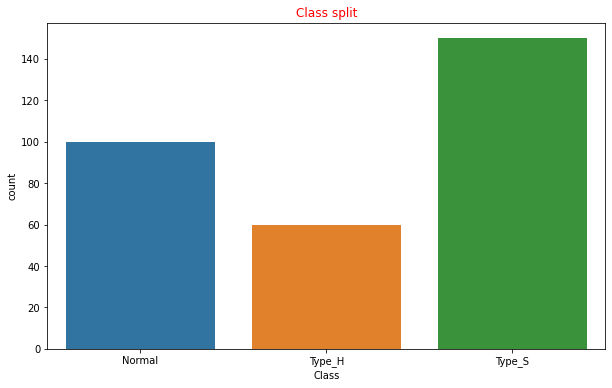

In [19]:
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title('Class split', color = 'red')
sns.countplot(x = 'Class', data = df2_append)

In [20]:
# Descriptive Statistics

df2_append.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


<AxesSubplot:>

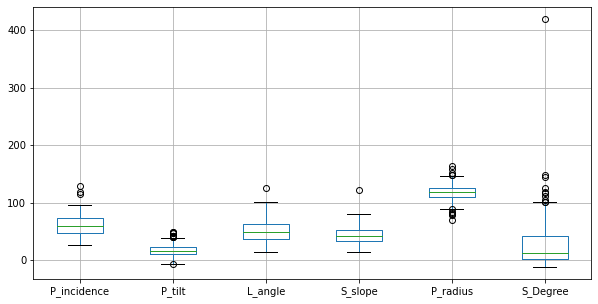

In [21]:
df2_append.boxplot(column = ['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree'], figsize = (10,5))

It is evident that attributes have outliers. But since KNN model will not have any impact due outliers. we will proceed without removing outliers

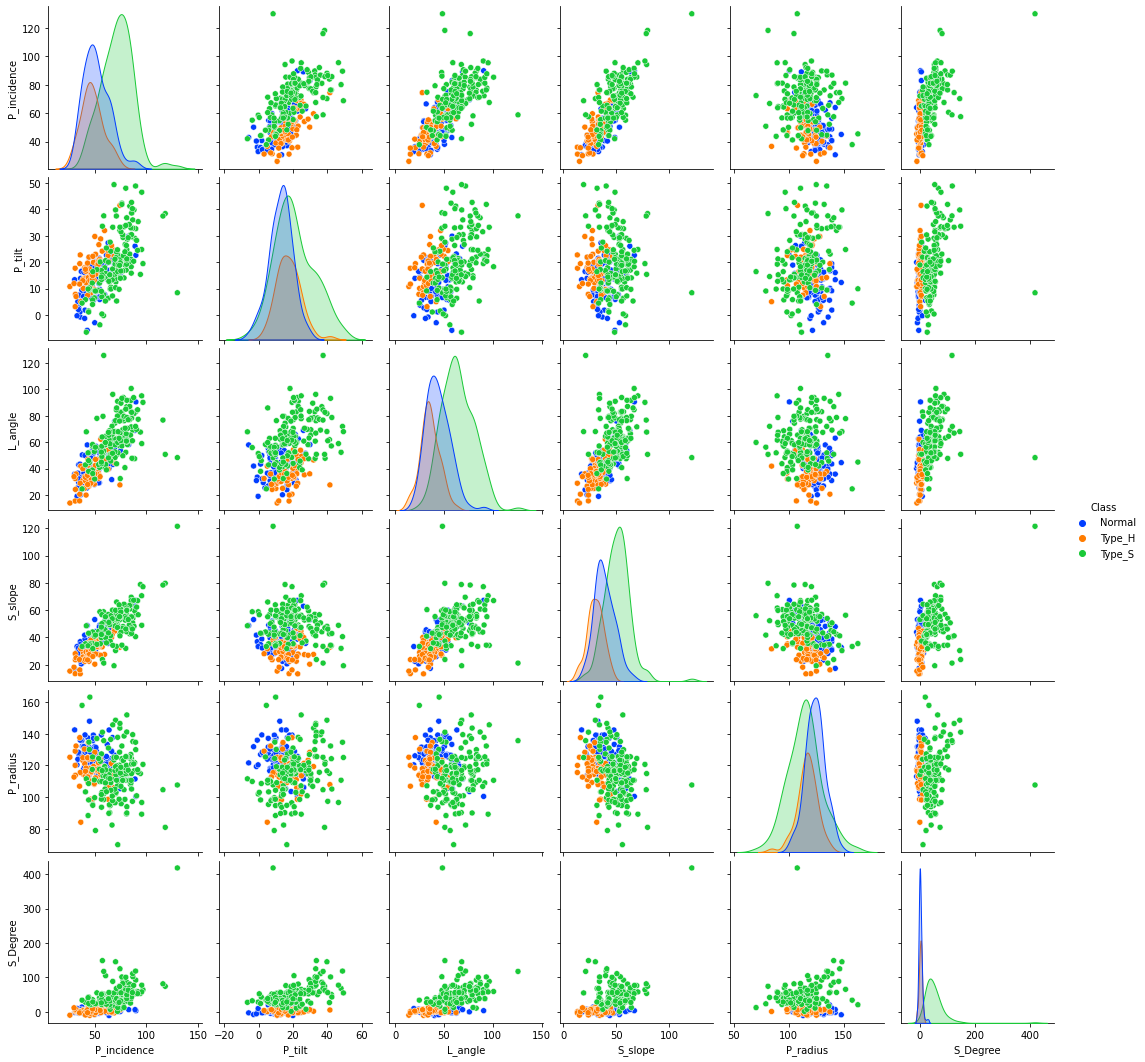

In [22]:
# Displaying a multivariate analysis
sns.pairplot(data=df2_append, hue="Class", palette="bright")

In [22]:
cor =df2_append.corr()
cor

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


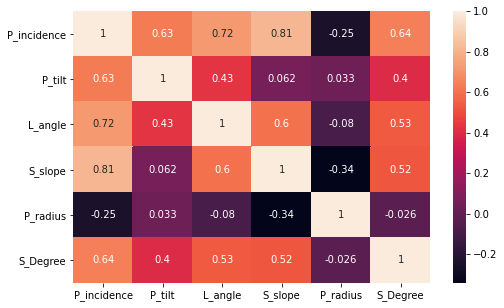

In [23]:
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(cor, annot=True,  ax=ax)
plt.show()

array([[<AxesSubplot:title={'center':'P_incidence'}>,
        <AxesSubplot:title={'center':'P_tilt'}>],
       [<AxesSubplot:title={'center':'L_angle'}>,
        <AxesSubplot:title={'center':'S_slope'}>],
       [<AxesSubplot:title={'center':'P_radius'}>,
        <AxesSubplot:title={'center':'S_Degree'}>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

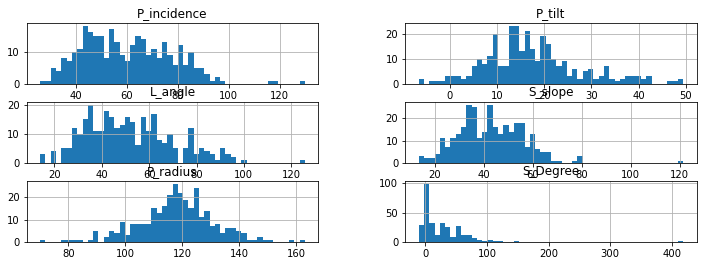

In [25]:
# Histogram for independent attributes
columns=list(df2_append)[0:-1]
df2_append[columns].hist(figsize=(12,20),bins=50,stacked=False,layout=(14,2))

In [26]:
#Segregate predictors vs target attributes
y=df2_append["Class"].values
x=df2_append.drop(["Class"],axis=1)

In [27]:
# Value Counts between the class
df2_append['Class'].value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [28]:
# Implementing Normalisation
z = (x - np.min(x)) / (np.max(x) - np.min(x))
z.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,0.119180,0.420085,0.188942,0.075642,0.618897,0.044331
1,0.277500,0.455882,0.336501,0.209004,0.599688,0.030400
2,0.175670,0.276858,0.294446,0.204049,0.635973,0.037366
3,0.213828,0.428799,0.304271,0.161942,0.633388,0.023620
4,0.188587,0.307480,0.255748,0.200578,0.646271,0.017852


In [29]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [30]:
#Lets check split of data
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df2_append.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df2_append.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [31]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (217, 6)
y_train shape:  (217,)
x_test shape:  (93, 6)
y_test shape:  (93,)


In [32]:
# Label Encoding
le= LabelEncoder()
df2_append['Class'] = le.fit_transform(df2_append['Class'])

In [33]:
# Storing the encoded file in a folder
df2_append.to_csv('C:/04-AIML/03 Supervised Learning/02 Project/Data File/console_encode.csv',index=False)

In [34]:
df2_append

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,2
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,2
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,2
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,2


In [35]:
sm = SMOTE(random_state=1)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

from collections import Counter
print("Before Smote :",Counter(y_train))
print("After Smote :",Counter(y_train_res))

After OverSampling, the shape of train_x: (306, 6)
After OverSampling, the shape of train_y: (306,) 

Before Smote : Counter({'Type_S': 102, 'Normal': 72, 'Type_H': 43})
After Smote : Counter({'Normal': 102, 'Type_S': 102, 'Type_H': 102})


 SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

From the above minority class = Type_H = 43 From the above majority Type_S = 102

After smote the datasets are balanced



In [36]:
# Creating model with the k value of 3
knn = KNeighborsClassifier(n_neighbors = 3)

# Training the model
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
# Predicting our y values using our KNN model and x_test:
prediction = knn.predict(x_test)

In [37]:
# Predicting our y values using our KNN model and x_test:
prediction = knn.predict(x_test)

# Comparing y_prediction and y_test values:
datashow = {'y_prediction': prediction, 'y_test': y_test}
d_new = pd.DataFrame(datashow)
d_new.T   # For the ease of reading I implemented transpose of our dataset.

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
y_prediction,Normal,Type_S,Normal,Normal,Normal,Type_H,Type_S,Type_H,Type_H,Type_S,...,Type_S,Normal,Type_H,Type_H,Normal,Type_H,Type_S,Normal,Type_S,Normal
y_test,Normal,Type_S,Type_S,Normal,Type_H,Type_H,Type_S,Type_H,Type_H,Type_S,...,Type_S,Normal,Normal,Type_H,Type_H,Normal,Type_S,Normal,Type_S,Type_H


In [38]:
print('Score of the model for k=3: ', knn.score(x_test, y_test))

Score of the model for k=3:  0.8064516129032258


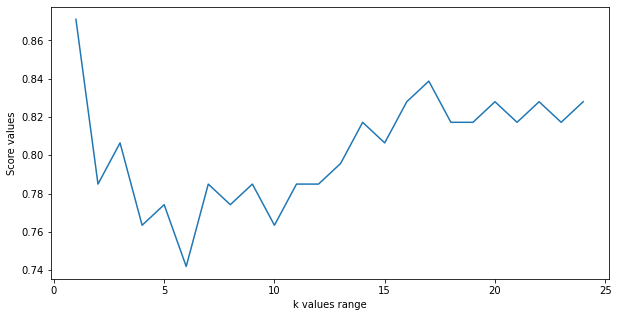

In [39]:
# Investigating the Best K value
score_list=[]
for each in range(1,25):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2 = knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,25), score_list)
plt.xlabel('k values range')
plt.ylabel('Score values')
plt.show()

In [39]:
# Predicting our y values using our KNN model and x_test:
prediction = knn.predict(x_test)
#Comparing y_prediction and y_test values:
datashow = {'y_prediction': prediction, 'y_test': y_test}
d_new = pd.DataFrame(datashow)
#d_new.T   # For the ease of reading I implemented transpose of our dataset.
d_new

,y_prediction,y_test
0,Normal,Normal
1,Type_S,Type_S
2,Normal,Type_S
3,Normal,Normal
4,Normal,Type_H
...,...,...
88,Type_H,Normal
89,Type_S,Type_S
90,Normal,Normal
91,Type_S,Type_S


In [40]:
print('Score of the model for k=1: ', knn.score(x_test, y_test))

Score of the model for k=1:  0.8064516129032258


In [41]:
#Compute accuracy on the training set
train_accuracy = knn.score(x_train, y_train)
 #Compute accuracy on the test set
test_accuracy = knn.score(x_test, y_test)

print('train_accuracy is :',train_accuracy)
print('test_accuracy is :',test_accuracy)

train_accuracy is : 0.9170506912442397
test_accuracy is : 0.8064516129032258


In [43]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Generate plot
#plt.title('k-NN Varying number of neighbors')
#plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
#plt.plot(neighbors, train_accuracy, label='Training accuracy')
#plt.legend()
#plt.xlabel('Number of neighbors')
#plt.ylabel('Accuracy')
#plt.show()

In [44]:
prediction = pd.DataFrame(prediction)

In [45]:
x_test.head()
x_test.to_csv('C:/04-AIML/03 Supervised Learning/02 Project/Data File/test_data.csv',index=False)


In [47]:
df1 = pd.read_csv('C:/04-AIML/03 Supervised Learning/02 Project/Data File/test_data.csv')
df1

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,74.565015,15.724320,58.618582,58.840695,105.417304,0.599247
1,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133
2,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315
3,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484
4,43.922840,14.177959,37.832547,29.744881,134.461016,6.451648
...,...,...,...,...,...,...
88,30.741938,13.354966,35.903526,17.386972,142.410107,-2.005373
89,65.755679,9.832874,50.822895,55.922805,104.394959,39.307212
90,47.319648,8.573680,35.560252,38.745967,120.576972,1.630664
91,57.035097,0.345728,49.198003,56.689369,103.048698,52.165145


In [48]:
concat_data = pd.concat([df1,d_new],axis=1)
concat_data.to_csv('C:/04-AIML/03 Supervised Learning/02 Project/Data File/con_data.csv',index=False)

In [48]:
print(metrics.classification_report(y_test, prediction));

              precision    recall  f1-score   support

      Normal       0.68      0.75      0.71        28
      Type_H       0.59      0.59      0.59        17
      Type_S       0.98      0.92      0.95        48

    accuracy                           0.81        93
   macro avg       0.75      0.75      0.75        93
weighted avg       0.82      0.81      0.81        93



Confusion Matrix


<AxesSubplot:>

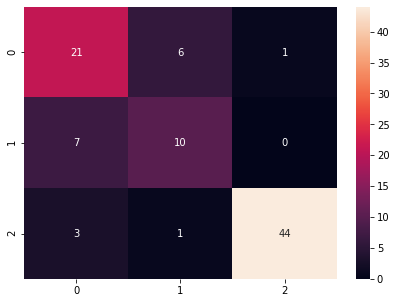

In [49]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test,prediction)
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True)

Possible Tuning Technique KNN

In [50]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [51]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(knn,param_grid,cv=10)

In [52]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [53]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 7}

In [54]:
gs.cv_results_['params']

[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [55]:
gs.cv_results_['mean_test_score']

array([0.8030303 , 0.81666667, 0.8025974 , 0.84437229, 0.82099567,
       0.83008658, 0.84805195, 0.83939394, 0.8030303 , 0.81666667,
       0.8025974 , 0.84437229, 0.82099567, 0.83008658, 0.84805195,
       0.83939394, 0.8030303 , 0.81666667, 0.8025974 , 0.84437229,
       0.82099567, 0.83008658, 0.84805195, 0.83939394, 0.8030303 ,
       0.81666667, 0.8025974 , 0.84437229, 0.82099567, 0.83008658,
       0.84805195, 0.83939394])

KNN is the best model as both test and train accurancy is above 80% . 
Recommend to improve the accuracy by segmentation/Hypertuning technique.


After SMOTE and Grid Search CV the test accuracy is at 80% and train accuracy is at 91% which determines the model overfitting

 As an improvement measure need to increase the sample size of the datasets and to conduct the model hypertuning towards dimensionality reduction. Since the accuracy is higher need to conduct the pilot test of prediction

Need to also create the user interface where the user can able to run the model and based on the model output can compare the same with the actuals

quality - Improve the quality of the data through ensuring the zero missing data and establishing the critical data capturing

quantity - Increase the sample size which is aligned to the near population

variety - Identify of key factors through the data structuring and stratification/segmentation

velocity- Need to re-define data quality metrics so that they are relevant as well as feasible in the real-time context.

veracity- Data source and the data use should be properly aligned